<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n250.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,44.424378,-0.002629,54.421749,54.424945,-0.003197
1,0.0,1.0,88.957200,0.000053,98.957253,98.956828,0.000426
2,0.0,2.0,75.962814,-0.000613,85.962202,85.962716,-0.000515
3,0.0,3.0,84.356895,0.000022,94.356917,94.356620,0.000297
4,0.0,4.0,26.689252,-0.007602,36.681650,36.690194,-0.008544
...,...,...,...,...,...,...,...
249995,999.0,245.0,28.775712,-0.005407,38.770304,38.775769,-0.005465
249996,999.0,246.0,60.667845,0.001711,70.669557,70.667850,0.001707
249997,999.0,247.0,58.744296,0.000522,68.744818,68.744304,0.000514
249998,999.0,248.0,65.347088,-0.001571,75.345517,75.347084,-0.001567


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,44.424378,-0.002629,54.421749,54.424945,-0.003197
1,0.0,1.0,88.957200,0.000053,98.957253,98.956828,0.000426
2,0.0,2.0,75.962814,-0.000613,85.962202,85.962716,-0.000515
3,0.0,3.0,84.356895,0.000022,94.356917,94.356620,0.000297
4,0.0,4.0,26.689252,-0.007602,36.681650,36.690194,-0.008544
...,...,...,...,...,...,...,...
249995,999.0,245.0,28.775712,-0.005407,38.770304,38.775769,-0.005465
249996,999.0,246.0,60.667845,0.001711,70.669557,70.667850,0.001707
249997,999.0,247.0,58.744296,0.000522,68.744818,68.744304,0.000514
249998,999.0,248.0,65.347088,-0.001571,75.345517,75.347084,-0.001567


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    44.424378 -0.002629  54.421749  54.424945 -0.003197
      1.0    88.957200  0.000053  98.957253  98.956828  0.000426
      2.0    75.962814 -0.000613  85.962202  85.962716 -0.000515
      3.0    84.356895  0.000022  94.356917  94.356620  0.000297
      4.0    26.689252 -0.007602  36.681650  36.690194 -0.008544
...                ...       ...        ...        ...       ...
999.0 245.0  28.775712 -0.005407  38.770304  38.775769 -0.005465
      246.0  60.667845  0.001711  70.669557  70.667850  0.001707
      247.0  58.744296  0.000522  68.744818  68.744304  0.000514
      248.0  65.347088 -0.001571  75.345517  75.347084 -0.001567
      249.0  39.892717  0.000581  49.893299  49.892756  0.000542

[250000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    44.424378 -0.002629  54.421749  54.424945 -0.003197
      1.0    88.957200  0.000053  98.957253  98.956828  0.000426
      2.0    75.962814 -0.000613  85.962202  85.962716 -0.000515
      3.0    84.356895  0.000022  94.356917  94.356620  0.000297
      4.0    26.689252 -0.007602  36.681650  36.690194 -0.008544
...                ...       ...        ...        ...       ...
999.0 245.0  28.775712 -0.005407  38.770304  38.775769 -0.005465
      246.0  60.667845  0.001711  70.669557  70.667850  0.001707
      247.0  58.744296  0.000522  68.744818  68.744304  0.000514
      248.0  65.347088 -0.001571  75.345517  75.347084 -0.001567
      249.0  39.892717  0.000581  49.893299  49.892756  0.000542

[250000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,44.424378,-0.002629,54.421749,54.424945,-0.003197
1,0.0,1.0,88.957200,0.000053,98.957253,98.956828,0.000426
2,0.0,2.0,75.962814,-0.000613,85.962202,85.962716,-0.000515
3,0.0,3.0,84.356895,0.000022,94.356917,94.356620,0.000297
4,0.0,4.0,26.689252,-0.007602,36.681650,36.690194,-0.008544
...,...,...,...,...,...,...,...
249995,999.0,245.0,28.775712,-0.005407,38.770304,38.775769,-0.005465
249996,999.0,246.0,60.667845,0.001711,70.669557,70.667850,0.001707
249997,999.0,247.0,58.744296,0.000522,68.744818,68.744304,0.000514
249998,999.0,248.0,65.347088,-0.001571,75.345517,75.347084,-0.001567


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    44.424378 -0.002629  54.421749  54.424945 -0.003197
      1.0    88.957200  0.000053  98.957253  98.956828  0.000426
      2.0    75.962814 -0.000613  85.962202  85.962716 -0.000515
      3.0    84.356895  0.000022  94.356917  94.356620  0.000297
      4.0    26.689252 -0.007602  36.681650  36.690194 -0.008544
...                ...       ...        ...        ...       ...
999.0 245.0  28.775712 -0.005407  38.770304  38.775769 -0.005465
      246.0  60.667845  0.001711  70.669557  70.667850  0.001707
      247.0  58.744296  0.000522  68.744818  68.744304  0.000514
      248.0  65.347088 -0.001571  75.345517  75.347084 -0.001567
      249.0  39.892717  0.000581  49.893299  49.892756  0.000542

[250000 rows x 5 columns]

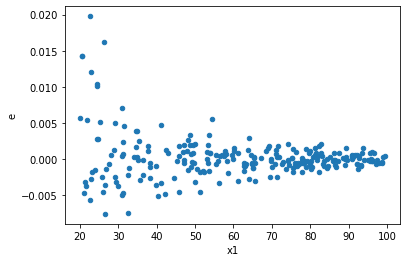

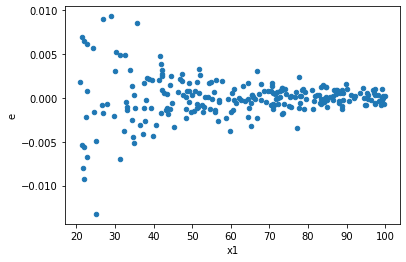

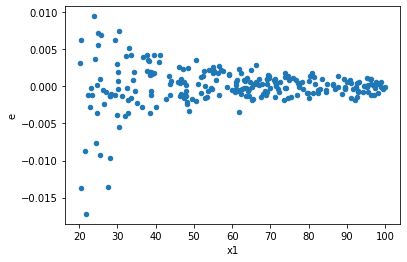

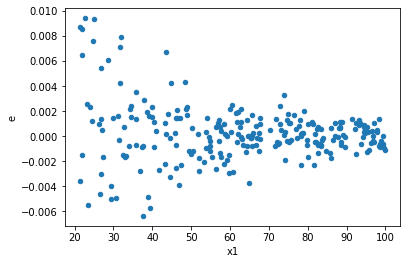

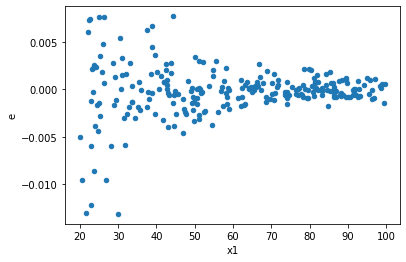

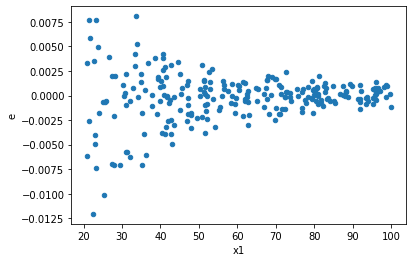

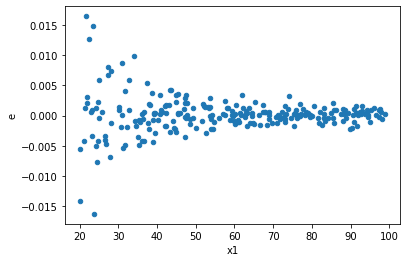

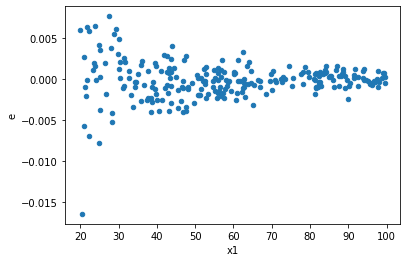

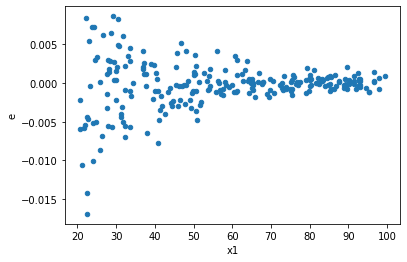

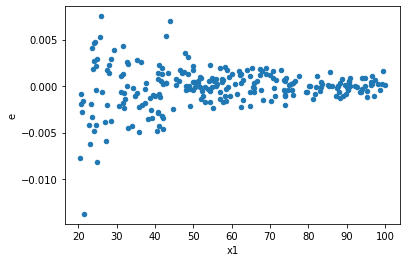

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,99.0,99.0,0.002146781403046265,6.738543324116292e-05,2.168466063683096e-05,6.806609418299285e-07,0.03138905206908516,9.848874967433661e-48,Reject001=0 : Heteroscedasticity
1.0,99.0,99.0,0.0013290188254907083,7.065810877420641e-05,1.3424432580714226e-05,7.137182704465294e-07,0.05316561919137421,2.765422678557209e-37,Reject001=0 : Heteroscedasticity
2.0,99.0,99.0,0.0017625484188913151,7.519745738342508e-05,1.7803519382740557e-05,7.595702766002534e-07,0.042664051992810544,1.3584903878202252e-41,Reject001=0 : Heteroscedasticity
3.0,99.0,99.0,0.0010531605859621068,9.397557507875654e-05,1.0637985716788958e-05,9.49248233118753e-07,0.08923195221259242,1.4345615966324526e-27,Reject001=0 : Heteroscedasticity
4.0,99.0,99.0,0.001670584047397727,7.334164054218674e-05,1.6874586337350778e-05,7.408246519412802e-07,0.04390179629479355,4.987682284593906e-41,Reject001=0 : Heteroscedasticity
5.0,99.0,99.0,0.0013643378090695858,8.429539982748494e-05,1.3781189990601877e-05,8.514686851261105e-07,0.06178484482884077,2.1309418214884816e-34,Reject001=0 : Heteroscedasticity
6.0,99.0,99.0,0.002209141280163642,8.635875798165069e-05,2.231455838549133e-05,8.723106866833402e-07,0.03909155053010176,2.4981458437618675e-43,Reject001=0 : Heteroscedasticity
7.0,99.0,99.0,0.001132626219806422,8.174100404193848e-05,1.1440668886933557e-05,8.256667074943281e-07,0.07216944355738904,1.8145615624164135e-31,Reject001=0 : Heteroscedasticity
8.0,99.0,99.0,0.0021631792471039904,5.869097825377099e-05,2.1850295425292833e-05,5.928381641795049e-07,0.027131814588340276,1.0821475733169993e-50,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64